# A1. SAT-GPA example

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATASET_PATH = "/home/m1nhd3n/Works/AI/ML/datasets/sat-gpa/sat_gpa.csv"

In [106]:
df = pd.read_csv(DATASET_PATH)
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


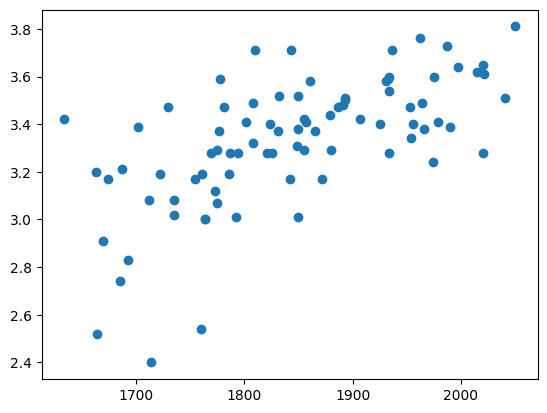

In [107]:
plt.scatter(df["SAT"], df["GPA"])

We should choose k = sqrt(N) for many KNNs problems.

In [108]:
k = 8

def distance(array, value):
    array = np.array(array)
    return abs(array - value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

n = len(df)
X_train = df["SAT"][:64].to_numpy()
y_train = df["GPA"][:64].to_numpy()

X_test = df["SAT"][64:].to_numpy()
y_test = df["GPA"][64:].to_numpy()

In [109]:
y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indices = find_nearest_index(X_train, X_test[i], k=8)
    for idx in indices:
        y_pred[i] = y_pred[i] + y_train[idx]
    y_pred[i] /= len(indices)
    print(y_pred[i], y_test[i])

3.3925000000000005 3.51
3.2749999999999995 3.52
3.2949999999999995 3.52
3.3975000000000004 3.54
3.295 3.58
3.3974999999999995 3.58
3.3975000000000004 3.59
3.2587500000000005 3.59
3.3899999999999997 3.6
3.3975000000000004 3.6
3.3874999999999993 3.61
3.3874999999999993 3.62
3.3662499999999995 3.64
3.3874999999999993 3.65
3.2950000000000004 3.71
3.3975000000000004 3.71
3.30875 3.71
3.3662500000000004 3.73
3.37625 3.76
3.3874999999999993 3.81


In [110]:
from sklearn.metrics._regression import mean_squared_error, mean_absolute_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

MSE: 0.08137789062500003
MAE: 0.2711875000000001
R2: -10.951518670142466


# A2. Temp-Pressure example

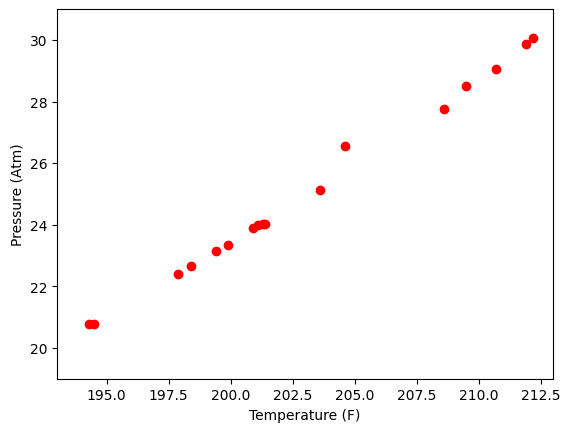

In [111]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [112]:
X_train = X[:16]
y_train = y[:16]
X_test = X[16:]
y_test = y[16:]

In [113]:
y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indices = find_nearest_index(X_train, X_test[i], 4)
    for idx in indices:
        y_pred[i] = y_pred[i] + y_train[idx]
    y_pred[i] /= len(indices)
    print(y_pred[i], y_test[i])

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

20.79 [30.06]
MSE: 85.93289999999999
MAE: 9.27


/tmp/ipykernel_7149/2858666148.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = y_pred[i] + y_train[idx]


# A3. US Fuel example

In [114]:
DATASET_PATH = "/home/m1nhd3n/Works/AI/ML/datasets/us_fuel_2001/fuel.txt"

df = pd.read_csv(DATASET_PATH)
df = df.drop(["State", "MPC"], axis="columns")
df.head()

,Drivers,FuelC,Income,Miles,Pop,Tax
0,3559897,2382507,23471,94440,3451586,18.0
1,472211,235400,30064,13628,457728,8.0
2,3550367,2428430,25578,55245,3907526,18.0
3,1961883,1358174,22257,98132,2072622,21.7
4,21623793,14691753,32275,168771,25599275,18.0


In [115]:
df["Fuel"] = df["FuelC"] / df["Pop"] * 1000
df["Dlic"] = df["Drivers"] / df["Pop"] * 1000
df["logMiles"] = np.log2(df["Miles"])
df.head()

,Drivers,FuelC,Income,Miles,Pop,Tax,Fuel,Dlic,logMiles
0,3559897,2382507,23471,94440,3451586,18.0,690.264418,1031.380067,16.527110
1,472211,235400,30064,13628,457728,8.0,514.279223,1031.641062,13.734286
2,3550367,2428430,25578,55245,3907526,18.0,621.475071,908.597153,15.753556
3,1961883,1358174,22257,98132,2072622,21.7,655.292668,946.570576,16.582436
4,21623793,14691753,32275,168771,25599275,18.0,573.912855,844.703336,17.364708


In [116]:
X = df.drop("Fuel", axis="columns")
y = df["Fuel"]
X_train = X[:40].to_numpy()
X_test = X[40:].to_numpy()
y_train = y[:40].to_numpy()
y_test = y[40:].to_numpy()

In [117]:
def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value, ord=2, axis=1)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

In [118]:
# Test to see if our distance function is correct

test = np.array([
    [1, 1, 1],
    [1, 0, 0],
    [0, 0, 2]
])
value = np.array([
    [1, 1, 1],
])
distance(test, value)

array([0.        , 1.41421356, 1.73205081])

In [119]:
y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indices = find_nearest_index(X_train, X_test[i], 4)
    for idx in indices:
        y_pred[i] += y_train[idx]
    y_pred[i] /= len(indices)
    print(y_pred[i], y_test[i])

645.7516849836362 711.7330576894062
618.2724155011775 697.0527770609518
625.3552044978319 638.2310609545192
501.2691144191463 681.100136591545
620.0035520945884 591.4999458878183
530.9960750098784 691.0227118608702
613.212654641754 681.0311214380635
625.3552044978319 576.0697495580029
615.8011038606852 562.4109333021843
650.847944069796 581.7937169457123
530.9960750098784 842.7917524261421


In [120]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

MSE: 16486.344795816774
MAE: 97.9402593443072
R2: -1.7002755312088609
